# 인공 신경망

### 1. 라이브러리 로드 및 데이터 생성

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt

# 선형 회귀와 동일한 방식

num_data = 1000
num_epoch = 10000

noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
x = init.uniform_(torch.Tensor(num_data,1),-15,15)
y = (x**2) + 3 
y_noise = y + noise

### 2. 모델, 손실/최적화 함수 설정

In [ ]:
model = nn.Sequential(
    nn.Linear(1,6),
    nn.ReLU(),
    nn.Linear(6,10),
    nn.ReLU(),
    nn.Linear(10,6),
    nn.ReLU(),
    nn.Linear(6,1)
)

loss_func = nn.L1Loss()
optimizer_adam = optim.Adam(model.parameters(), lr = 0.0002)
optimizer_SGD = optim.SGD(model.parameters(), lr = 0.0002)

### 3. 모델 학습

In [ ]:
# 1. SGD optimizer

loss_array_SGD = []

for i in range(num_epoch):
    optimizer_SGD.zero_grad()
    output = model(x)
    
    loss = loss_func(output, y_noise)
    loss.backward()
    optimizer_SGD.step()
    
    loss_array_SGD.append(loss.detach().numpy())

In [ ]:
# 2. adam optimizer

loss_array_adam = []

for i in range(num_epoch):
    optimizer_adam.zero_grad()
    output = model(x)
    
    loss = loss_func(output, y_noise)
    loss.backward()
    optimizer_adam.step()
    
    loss_array_adam.append(loss.detach().numpy())

### 4. 손실 그래프 비교

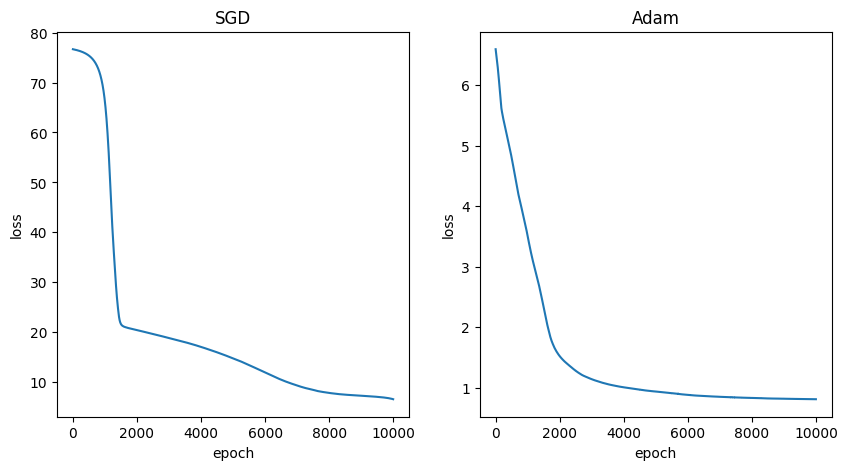

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols =2, figsize = (10,5))

axes[0].plot(loss_array_SGD)
axes[0].set_title('SGD')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss')

axes[1].plot(loss_array_adam)
axes[1].set_title('Adam')
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('loss')

plt.show()

### 5. 학습된 모델의 결과값과 실제 목표값의 비교

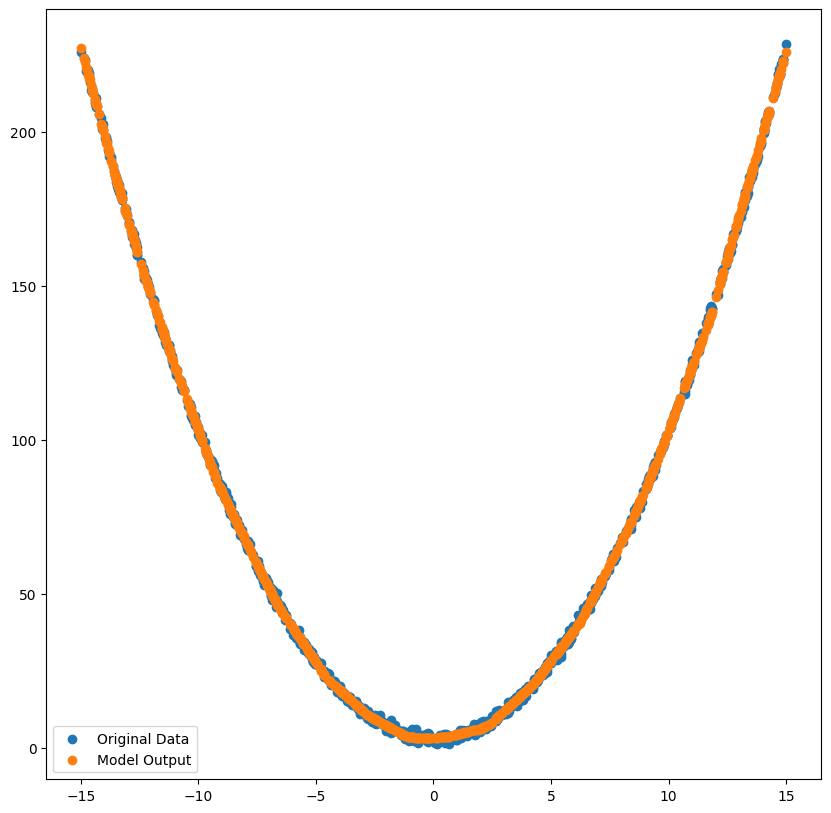

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x.detach().numpy(),y_noise,label="Original Data")
plt.scatter(x.detach().numpy(),output.detach().numpy(),label="Model Output")
plt.legend()
plt.show()